# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

- This script applies PCA to reduce the dimensions of the California Housing dataset, followed by clustering using the OPTICS algorithm with specific parameters.
- It includes:
  1. A visualization of the OPTICS reachability distance plot, illustrating the accessibility of data points based on cluster ordering.
  2. A geographical representation of clustering results and noise/outliers, plotting latitude and longitude coordinates with clusters differentiated by color.
- Each plot includes setup for axes, titles, labels, and color maps to effectively represent the clustering results and data distribution.

# Data Loading & Preprocessing

In [2]:
path = 'C:\\Users\\zcindemir\\Desktop\\Data Mining Project\\housing.csv'
housing = pd.read_csv(path)

housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

encoder = OneHotEncoder()
ocean_proximity_encoded = encoder.fit_transform(housing[['ocean_proximity']]).toarray()
feature_names = encoder.get_feature_names_out(['ocean_proximity'])
ocean_proximity_df = pd.DataFrame(ocean_proximity_encoded, columns=feature_names)
housing_encoded = pd.concat([housing.drop('ocean_proximity', axis=1), ocean_proximity_df], axis=1)

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_encoded)

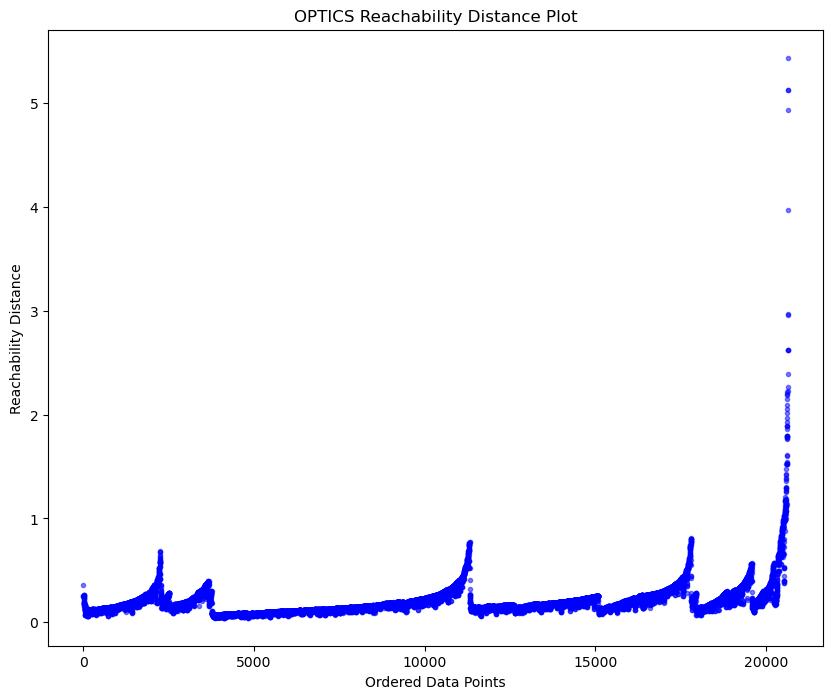

In [3]:
pca = PCA(n_components=4)
housing_pca = pca.fit_transform(housing_scaled)

optics_model = OPTICS(min_samples=5, xi=0.05, min_cluster_size=35)
optics_model.fit(housing_pca)

plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(optics_model.reachability_)), optics_model.reachability_[optics_model.ordering_], 'b.', alpha=0.5)
plt.xlabel('Ordered Data Points')
plt.ylabel('Reachability Distance')
plt.title('OPTICS Reachability Distance Plot')
plt.show()

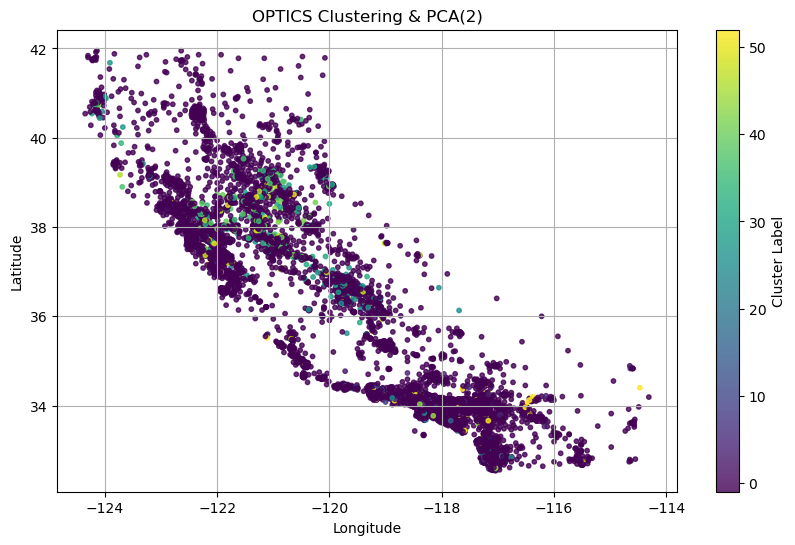

In [4]:
pca = PCA(n_components=2)
housing_pca = pca.fit_transform(housing_scaled)

optics_clust = OPTICS(min_samples=5, xi=0.05, min_cluster_size=35)
optics_clust.fit(housing_pca)

labels = optics_clust.labels_

colors = np.array(['#000000' if x == -1 else plt.cm.viridis(x) for x in labels / max(labels.max(), 1)], dtype=object)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(housing['longitude'], housing['latitude'], c=labels, cmap='viridis', s=10, alpha=0.8)
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'OPTICS Clustering & PCA(2)')
plt.grid(True)
plt.show()